1. 구글 뉴스 RSS에 접속하여 뉴스 제목, 뉴스 요약 가져오기

In [1]:
import requests                         # 웹 페이지의 HTML을 가져오는 모듈
import re                               # 정규표현식을 사용하기 위한 모듈
import xml.etree.ElementTree as ET      # XML 데이터를 파싱하는 모듈

from konlpy.tag import Okt
okt = Okt()
from collections import Counter

In [2]:
url = 'https://news.google.com/rss?hl=ko&gl=KR&ceid=KR:ko' 

headers = {
        'User-Agent': 'Mozilla/5.0',
        'Content-Type': 'text/html; charset=utf-8'
        }

response = requests.get(url, headers=headers)

root_element = ET.fromstring(response.text)         # XML 데이터를 파싱하여 XML 엘리먼트를 모두 가져옴
iter_element = root_element.iter(tag="item")        # item 태그를 찾아서 반복

In [3]:
title_list = []
description_list = []
for element in iter_element:
    title_list.append(element.find("title").text)           # title 태그에서 텍스트 추출

    # 한글과 띄어쓰기를 제외한 모든 글자를 제거
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')                  # 한글과 띄어쓰기를 제외한 모든 글자
    description = element.find("description").text          # description 태그에서 텍스트 추출
    description_list.append(hangul.sub("",description))     
    #description_list.append(description)     

# 뉴스제목과 뉴스요약을 3개만 가져와 출력
print("뉴스제목: ",title_list[0:3])
print("뉴스요약: ",description_list[0:3])

뉴스제목:  ["“민주당 '가짜뉴스'로 양평 고속도로 멈춰”…“정치 성향 없이 말하라” - 한겨레", '보건의료노조 총파업 이틀 만에 종료… "복지부 협의 진행" - 한국일보', '김건희 여사, 순방 중 리투아니아 명품 매장서 포착···민주 “해명하라” - 경향신문']
뉴스요약:  ['  민주당 가짜뉴스로 양평 고속도로 멈춰정치 성향 없이 말하라 한겨레  국토부 김동연에 선전포고양평고속도로 공개 간담회 하자 동아일보  항의 터져 나온 양평 주민들 정쟁 그만 듣자사업부터 재추진 뉴스   원희룡 직권남용 고발국정조사 단독 추진에  정부가 대상 뉴스  원희룡 민주당 공수처 고발에 어이가 없다 한국경제   뉴스에서 전체 콘텐츠 보기', '  보건의료노조 총파업 이틀 만에 종료 복지부 협의 진행 한국일보  보건의료노조 파업 일차전국 의료 차질 지속  연합뉴스  연합뉴스  공공병원을 살려 주십시오폭우 속 총파업 나선 보건의료노조 한겨레  보건의료노조 총파업 민노총 동참정부 업무복귀명령 검토 뉴스  부산대병원 파업 뇌관 비정규직 직고용평행선 달리는 노사 한국경제   뉴스에서 전체 콘텐츠 보기', '  김건희 여사 순방 중 리투아니아 명품 매장서 포착민주 해명하라 경향신문  순방중인 김건희 여사 명품 편집숍 방문 현지 언론에 포착 한겨레  추미애 김 여사 해외서 명품쇼핑물폭탄 서민들 먹먹 동아일보  경제 외교로 순방 마무리김건희 여사 순방 중 명품 쇼핑 뉴스  민주 김건희 여사 리투아니아 명품 매장서 쇼핑한 것 맞나 연합뉴스   뉴스에서 전체 콘텐츠 보기']


2. 형태소를 분석하여 빈도수를 계산

In [4]:
noun_list = []
for title in title_list:
    for noun in okt.nouns(title):
        if len(noun) > 1:
            noun_list.append(noun)
# print("명사: ", noun_list)

for description in description_list:
    for noun in okt.nouns(description):
        if len(noun) > 1:
            noun_list.append(noun)
# print("명사: ", noun_list)

noun_freq_list = Counter(noun_list)
print(noun_freq_list)

Counter({'뉴스': 62, '연합뉴스': 31, '전체': 28, '콘텐츠': 28, '보기': 28, '한겨레': 19, '경제': 18, '한국': 16, '동아일보': 11, '일보': 9, '경향신문': 8, '폭우': 8, '나토': 8, '정부': 8, '민주당': 7, '가짜': 7, '대통령': 7, '이재명': 7, '한국어': 7, '손흥민': 7, '조선일보': 7, '의료': 6, '여사': 6, '명품': 6, '빌라': 6, '배후': 6, '징역': 6, '김문기': 6, '충청': 6, '갤럭시': 6, '한화': 6, '오션': 6, '경기': 6, '위험': 6, '이봉주': 6, '남태현': 6, '마약': 6, '이강인': 6, '시간': 6, '보건': 5, '노조': 5, '김건희': 5, '혁신': 5, '지지율': 5, '하락': 5, '오염수': 5, '아들': 5, '아버지': 5, '신문': 5, '외교': 5, '출시': 5, '압구정': 5, '호위함': 5, '하방': 5, '완화': 5, '게임': 5, '남명렬': 5, '연기': 5, '대수술': 5, '최준희': 5, '아이': 5, '중앙': 5, '양평': 4, '총파업': 4, '진행': 4, '순방': 4, '불체포특권': 4, '포기': 4, '군산': 4, '침수': 4, '장관': 4, '방송': 4, '정상': 4, '공식': 4, '손목': 4, '구역': 4, '설계': 4, '공모': 4, '해군': 4, '선정': 4, '둔화': 4, '배우': 4, '발언': 4, '코리아': 4, '식당': 4, '알바': 4, '난입': 4, '지인': 4, '전국': 4, '피해': 4, '전화': 4, '호남': 4, '종합': 4, '논란': 4, '사과': 4, '고속도로': 3, '이틀': 3, '협의': 3, '리투아니아': 3, '매장': 3, '포착': 3, '민주': 3, '해명': 3, '대폭': 3, '영향': 3

3. 워드클라우드 그리기

In [5]:
from wordcloud import WordCloud

wc = WordCloud(font_path="NanumGothic", width=400, height=400, scale=2.0, max_font_size=250) # 폰트 지정
gen = wc.generate_from_frequencies(noun_freq_list)  # 단어 빈도수로부터 워드클라우드 생성
wc.to_file('뉴스_워드클라우드.png')                  # 워드클라우드를 이미지 파일로 저장

4. 마스크 적용하기

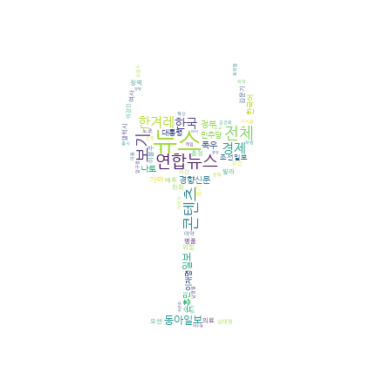

In [8]:
import numpy as np
from PIL import Image # 이미지를 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지화 라이브러리

wine_mask = np.array(Image.open('img.jpg'))    # 이미지를 읽어와서 넘파이 배열로 저장
wordcloud = WordCloud(font_path="NanumGothic", background_color='white', mask=wine_mask, max_font_size=30).generate_from_frequencies(noun_freq_list)

plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear') 
plt.show()